In [15]:
#import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from collections import deque

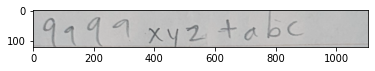

In [16]:
img = cv2.imread("../input/polynomial-dataset/Polynomial data/polynomial pics/page 1 (41 pics)/7.png")
plt.imshow(img, cmap='gray')

In [17]:
#img = cv2.resize(img, (250, 25))
img = cv2.blur(img,(4,4))

[[[221 225 229]
  [221 225 229]
  [221 225 227]
  ...
  [211 215 215]
  [207 211 211]
  [205 209 209]]

 [[221 225 229]
  [221 225 229]
  [221 225 227]
  ...
  [211 215 215]
  [207 211 211]
  [205 209 209]]

 [[223 225 229]
  [223 225 229]
  [221 225 229]
  ...
  [213 217 217]
  [209 213 213]
  [207 211 211]]

 ...

 [[193 189 187]
  [193 189 187]
  [193 187 187]
  ...
  [215 219 221]
  [215 219 219]
  [213 217 219]]

 [[203 199 197]
  [203 199 197]
  [203 199 197]
  ...
  [213 217 219]
  [213 217 219]
  [211 215 217]]

 [[215 209 207]
  [215 209 207]
  [213 207 205]
  ...
  [213 217 219]
  [211 215 217]
  [211 215 217]]]


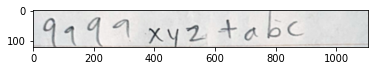

In [18]:
minPixel = np.min(img)
maxPixel = np.max(img)

lut = np.zeros(256, dtype=np.uint8)
lut[minPixel:maxPixel+1]=np.linspace(start=0,stop=255,num=(maxPixel-minPixel)+1,endpoint=True,dtype=np.uint8)

plt.imshow(lut[img])
print(lut[img])
img = lut[img]

In [19]:
vis = np.zeros((img.shape[0], img.shape[1]))
newvis = np.zeros((img.shape[0], img.shape[1]))
print(vis.shape, img.shape)

top = img.shape[0]
bottom = 0
left = img.shape[1]
right = 0

def floodFill(x, y, minval, img):
    global top, bottom, newvis, left, right, vis
    #print("asdf")
    if(x < 0 or y < 0 or x >= img.shape[0] or y >= img.shape[1]):
        #print("a;lskdjfnalsdjkfnaskdfnakjsdnfkj")
        return
    if(newvis[x][y] == 1):
        return
    #print(x, y)
    if(sum(img[x][y])/3 > minval):
        return
    newvis[x][y] = 1
    top = min(top, x)
    bottom = max(bottom, x)
    left = min(left, y)
    right = max(right, y)
    
    floodFill(x+1, y, minval, img)
    floodFill(x-1, y, minval, img)
    floodFill(x, y+1, minval, img)
    floodFill(x, y-1, minval, img)
    floodFill(x+1, y+1, minval, img)
    floodFill(x-1, y+1, minval, img)
    floodFill(x+1, y-1, minval, img)
    floodFill(x-1, y-1, minval, img)

(120, 1105) (120, 1105, 3)


In [20]:
import sys
sys.setrecursionlimit(100000)

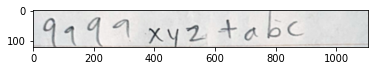

In [40]:
vis = np.zeros((img.shape[0], img.shape[1]))
plt.imshow(img)
#print(vis[30])
boxes = []
symbols = 0

for j in range(img.shape[1]):
    for i in range(img.shape[0]):
        #print(img[i][j])
        #print(sum(img[i][j]) > 240*3)
        #pass
        
        if(vis[i][j] == 0 and sum(img[i][j])/3 < 170):
            #print(i, j)
            newvis = np.zeros((img.shape[0], img.shape[1]))
            top = img.shape[0]
            bottom = 0
            left = img.shape[1]
            right = 0
            floodFill(i, j, 170, img)
            #symbols += 1
            
            #print(top, left, bottom, right)
            if(np.sum(newvis) > 10):
                symbols += 1
                vis = vis + newvis
                boxes.append([left, right, bottom, top])
        

In [22]:
print(np.sum(vis))

8359.0


In [23]:
print(boxes)

[[774, 816, 91, 0], [179, 228, 118, 24], [34, 76, 119, 26], [263, 315, 85, 31], [620, 671, 90, 31], [840, 886, 83, 37], [505, 565, 101, 49], [103, 140, 114, 52], [697, 738, 98, 56], [382, 428, 108, 58], [443, 479, 119, 61], [613, 620, 71, 69]]


12


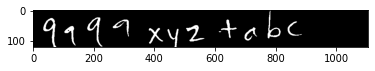

In [41]:
plt.imshow(vis*255, cmap="gray")
print(symbols)

In [25]:
boxarr = np.zeros(vis.shape)
for i in range(len(boxes)):
    for j in range(boxes[i][0], boxes[i][1]):
        boxarr[boxes[i][2]][j] = 1
        boxarr[boxes[i][3]][j] = 1
    for j in range(boxes[i][3], boxes[i][2]):
        boxarr[j][boxes[i][0]] = 1
        boxarr[j][boxes[i][1]] = 1
    #boxarr[boxes[i][2]][boxes[i][0]] = 1
   # boxarr[boxes[i][3]][boxes[i][1]] = 1

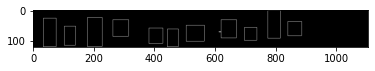

In [42]:
plt.imshow(boxarr*255, cmap='gray')

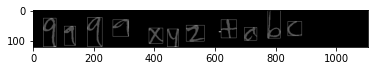

In [27]:
plt.imshow(boxarr*255 + vis*125, cmap='gray')

[34, 76, 119, 26]


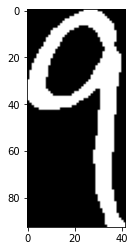

[103, 140, 114, 52]


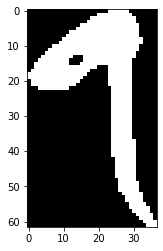

[179, 228, 118, 24]


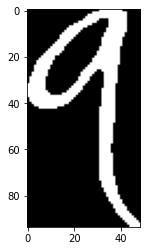

[263, 315, 85, 31]


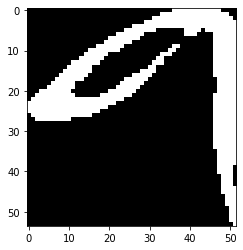

[382, 428, 108, 58]


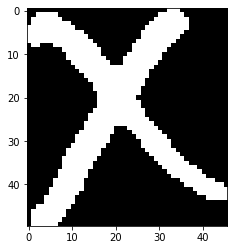

[443, 479, 119, 61]


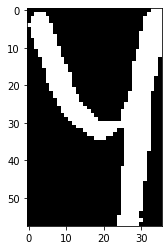

[505, 565, 101, 49]


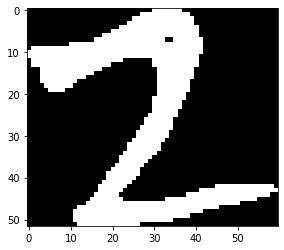

[613, 620, 71, 69]


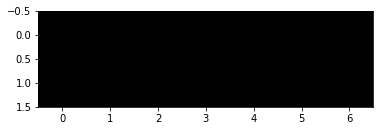

[620, 671, 90, 31]


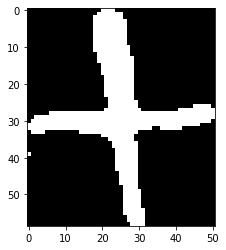

[697, 738, 98, 56]


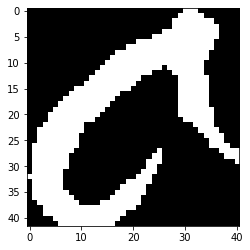

[774, 816, 91, 0]


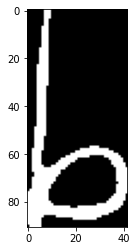

[840, 886, 83, 37]


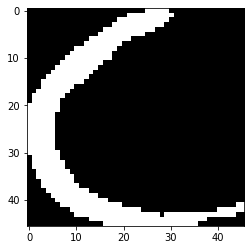

In [43]:
for i in range(len(boxes)):
    box = boxes[i]
    print(box)
    plt.imshow(vis[box[3]:box[2], box[0]:box[1]], cmap='gray')
    plt.show()
    